# Supervised and Unsupervised Learning Algorithms for Genre Classification and Song Popularity

**<span style="color:CornflowerBlue">by Samantha Garcia, Brainstation Data Science Student (May - August 2022) </span>**

## Notebook 4: Unsupervised Learning - Clustering

### Table of Contents

    [1. Recap](#recap)
        1.1 Business Question
        1.2 Modeling Expectations
        1.3 Feature Dictionary
        1.4 Import Packages and Dataframe
        
    [2. Modeling]
        [2.1 K-Means Model](#kmeans-model)
        [2.2 DBSCAN Model](#dbscan-model)
        [2.3 Hierarchical Clustering](#hierarchical-clustering)
    
    [3. Findings](#findings)
        [3.1 Compare the Clusters](#)
        [3.2 Check Statistical Significance](#)
        
    [4. Defining the Clusters]
        [4.1 Cluster Feature Similarity](#)
        [4.2 Naming the Clusters](#)
        
---
        

## 1. Recap

### 1.1 Business Question

>For any given song, can we derive a song's TRUE genre and subgenre - i.e. by inspecting the song's audio attributes derived by Spotify

Often, songs are given a genre subjectively by music managers' opinion. Developing an in-house model for categorising genre based on attributes, as well as a popularity measure, can be of value particularly when tailored for use alongside private data held by the song copyright owners.

**We will implement 2 learning algorithms as follows:**

1. a supervised learning model where we tell the algorithm what genres the songs belong to, based on subjective 'human' genre labels


2. an unsupervised learning model where we ask the algorithm to cluster songs based on their attributes, without seeing the songs' existing genre labels

**We will then see what clusters are derived by the unsupervised learning model and deduce:**

1. can define the song clusters in a way that is understandable to the average human music listener? we can cross reference the cluster outputs from this algorithm against the genre classes from the supervised learning algorithm to deteremine whether the genres are 'natural' genres or not


2. can we attribute song clusters as more or less valuable than others and deduce what song attributes contribute most to song value (based on popularity/ consumption)?

### 1.2 Modeling Expectations

In this notebook we are focusing on unsupervised learning algorithms: we will look at 3 clustering methods to see which is the best fit for our dataset:

- K-Means
- DBSCAN
- Hierarchical Clustering

If we have time we will also look at how Neural Networks perform at classifying our songs.

### 1.3 Feature Dictionary

The features that will be analysed in these models are as follows:

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"><code>danceability</code></td>
    <td style="text-align: left">Describes how suitable a track is for dancing based on a combination of musical elements including temppo, rhythm stability, beat stregth and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>energy</code></td>
    <td style="text-align: left">Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud and noisy. For example, death metal has high energy while a Bach prelude scores low on the scale. Perceptual features contribuiting to this attribute include dynamic range, perceived loudness, timbre, onset rate and general entropy.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>key</code></td>
    <td style="text-align: left">The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>loudness</code></td>
    <td style="text-align: left">The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>mode</code></td>
    <td style="text-align: left">Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>speechiness</code></td>
    <td style="text-align: left">Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>acousticness</code></td>
    <td style="text-align: left">number A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>instrumentalness</code></td>
    <td style="text-align: left">Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>liveness</code></td>
    <td style="text-align: left">Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>valence</code></td>
    <td style="text-align: left">A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>tempo</code></td>
    <td style="text-align: left">The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>time_signature</code></td>
    <td style="text-align: left">An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".</td>
  </tr>
</table>

---

### 1.4 Import Packages and Dataframe

Let's import our packages and csv file.

Our data has already been transformed, including scaling, in Notebook 2.

In [2]:
# import required packages
# packages will be added here as they come up during coding
# this is therefore a complete list of all packages used within this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [3]:
# import dataframe from csv file from notebook #2
unsupervised_df_num_scaled = pd.read_csv('../data/unsupervised_df_num_scaled.csv')

In [4]:
# have a look at the data
unsupervised_df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36203 entries, 0 to 36202
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        36203 non-null  int64  
 1   danceability      36203 non-null  float64
 2   energy            36203 non-null  float64
 3   key               36203 non-null  float64
 4   loudness          36203 non-null  float64
 5   mode              36203 non-null  float64
 6   speechiness       36203 non-null  float64
 7   acousticness      36203 non-null  float64
 8   instrumentalness  36203 non-null  float64
 9   liveness          36203 non-null  float64
 10  valence           36203 non-null  float64
 11  tempo             36203 non-null  float64
 12  time_signature    36203 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 3.6 MB


In [5]:
unsupervised_df_num_scaled.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,-0.861723,1.185910,-1.441121,-0.661062,0.821241,-0.782918,-0.757542,-0.416594,-0.398092,1.272541,-0.657929,0.150511
1,1,-0.147723,0.726598,-1.441121,0.252347,0.821241,-0.718207,-0.757141,-0.353860,2.436578,0.714713,0.541350,0.150511
2,2,-0.473307,1.520408,-1.441121,1.618777,0.821241,-0.655075,-0.498560,-0.416126,-0.749849,1.691960,0.046632,0.150511
3,3,-2.272588,0.991201,-0.063000,0.402740,0.821241,-0.554853,-0.763367,-0.415738,-0.056643,0.274323,0.946811,0.150511
4,4,0.480597,0.636732,-1.165497,-0.192387,0.821241,0.261129,0.791539,-0.417710,0.671352,0.408537,-1.210273,0.150511


In [6]:
# The Unnamed: 0 column keeps coming back on each import, can't figure out why (to fix)
# checked also in the csv file in the data drive and it is not visible there
# drop here for now but need to have a look with someone
unsupervised_df_num_scaled = unsupervised_df_num_scaled.drop(['Unnamed: 0'], axis=1)
unsupervised_df_num_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.861723,1.185910,-1.441121,-0.661062,0.821241,-0.782918,-0.757542,-0.416594,-0.398092,1.272541,-0.657929,0.150511
1,-0.147723,0.726598,-1.441121,0.252347,0.821241,-0.718207,-0.757141,-0.353860,2.436578,0.714713,0.541350,0.150511
2,-0.473307,1.520408,-1.441121,1.618777,0.821241,-0.655075,-0.498560,-0.416126,-0.749849,1.691960,0.046632,0.150511
3,-2.272588,0.991201,-0.063000,0.402740,0.821241,-0.554853,-0.763367,-0.415738,-0.056643,0.274323,0.946811,0.150511
4,0.480597,0.636732,-1.165497,-0.192387,0.821241,0.261129,0.791539,-0.417710,0.671352,0.408537,-1.210273,0.150511
...,...,...,...,...,...,...,...,...,...,...,...,...
36198,-0.467595,0.736583,0.488248,0.174695,0.821241,1.318592,-0.755698,-0.417696,0.896837,0.542751,0.688050,0.150511
36199,-0.399051,0.736583,-1.165497,0.158735,0.821241,2.652258,-0.729720,-0.417710,-0.423862,-0.837139,0.699973,0.150511
36200,-1.101628,-0.616390,0.488248,-0.388512,0.821241,1.216002,0.134061,-0.417710,-0.481844,0.320459,0.515235,0.150511
36201,1.011813,-0.117138,0.488248,0.119755,0.821241,1.168653,-0.701015,-0.409708,-0.623577,0.228187,1.431354,0.150511


In [6]:
unsupervised_df_num_scaled.shape

(36203, 12)

---
## 2. Modeling

### 2.1 K-Means Model

We saw in Notebook 2 that we could see what looked like 2 or 3 clusters in our t-SNE with 3 components (component 0 against component 1), which looked like this:



<img src="../images/tSNE_unsupervised.png" width="400" height="400"> 

Let's look at inertia and silhouette scores.

# DISCUSS HERE ABOUT WHAT THOSE MEAN

Inertia scores: we are hoping to see a clear inflection point / a clear break after which increasing k gives diminishing returns.
Is our expectation met? No, we're not really seeing any sharp elbow or inflection point. This suggests there is no quick loss of inertia as K increases. i.e. no clear way to separate the data.

Silhouette scores: high silhouette score = clear separation of data

In [7]:
# run a few k values to plot the inertia and silhouette scores
# we have 12 features so let's run 2 to 12
k_range = np.arange(2, 13)
inertia_list = []
silhouette_score_list = []

for k in k_range:
    #Instantiate
    KMeans_model = KMeans(n_clusters = k)
    # Fit KMeans
    y_labels = KMeans_model.fit_predict(unsupervised_df_num_scaled)
    # Save the intertia and silhouette scores
    inertia_list.append(KMeans_model.inertia_)
    silhouette_score_list.append(silhouette_score(unsupervised_df_num_scaled, y_labels))
    
    print(f'Computing scores for k = {k}') #to see that the model is running and hasn't crashed

Computing scores for k = 2
Computing scores for k = 3
Computing scores for k = 4
Computing scores for k = 5
Computing scores for k = 6
Computing scores for k = 7
Computing scores for k = 8
Computing scores for k = 9
Computing scores for k = 10
Computing scores for k = 11
Computing scores for k = 12


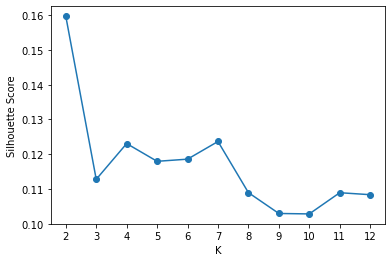

In [8]:
# plot silhouette scores
plt.figure()
plt.plot(k_range, silhouette_score_list, marker = 'o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.show()

### Discuss choice of n_clusters for KMeans model based on inertia and silhouette scores

In [9]:
# run kmeans model for chosen number of clusters
KMeans_model = KMeans(n_clusters = 2)
kmeans_y_labels = KMeans_model.fit_predict(unsupervised_df_num_scaled)

# Let's add our labels to the dataset so we can colour our clusters on graphs. 
kmeans_df = unsupervised_df_num_scaled.copy()
kmeans_df['kmeans_labels'] = kmeans_y_labels

In [10]:
sample = kmeans_df.sample(frac=0.4, random_state = 1)

# Instantiate t-SNE
tsne = TSNE(n_components = 3, random_state = 1, verbose = 1)
# Fit_Transform t-SNE
tsne_data = tsne.fit_transform(sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14481 samples in 0.226s...
[t-SNE] Computed neighbors for 14481 samples in 5.600s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14481
[t-SNE] Computed conditional probabilities for sample 2000 / 14481
[t-SNE] Computed conditional probabilities for sample 3000 / 14481
[t-SNE] Computed conditional probabilities for sample 4000 / 14481
[t-SNE] Computed conditional probabilities for sample 5000 / 14481
[t-SNE] Computed conditional probabilities for sample 6000 / 14481
[t-SNE] Computed conditional probabilities for sample 7000 / 14481
[t-SNE] Computed conditional probabilities for sample 8000 / 14481
[t-SNE] Computed conditional probabilities for sample 9000 / 14481
[t-SNE] Computed conditional probabilities for sample 10000 / 14481
[t-SNE] Computed conditional probabilities for sample 11000 / 14481
[t-SNE] Computed conditional probabilities for sample 12000 / 14481
[t-SNE] Computed conditional probabilities for sam

In [11]:
# create tSNE dataframe
tsne_df = pd.DataFrame(tsne_data, columns = [f'tSNE D{i+1}' for i in range(tsne_data.shape[1])])

In [12]:
# ADD CLUSTER LABELS
tsne_df['kmeans_labels'] = sample['kmeans_labels'].values

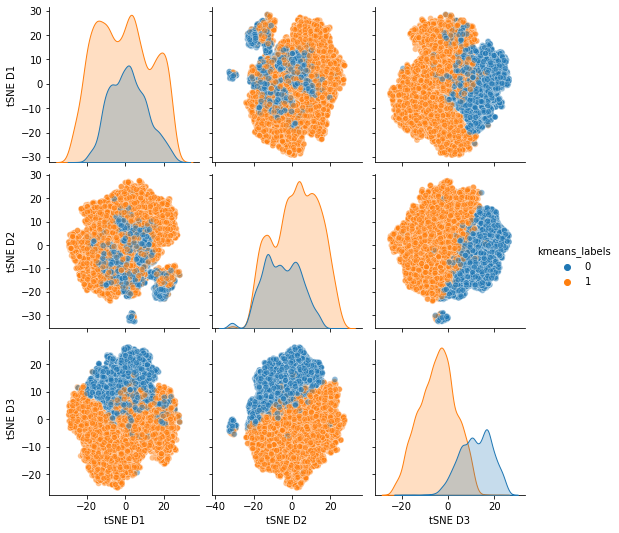

In [13]:
# visualise
sns.pairplot(tsne_df, hue = 'kmeans_labels', plot_kws = {'alpha': 0.5})

### 2.2 DBSCAN Model

DBScan is a density based model...

## SAY MORE ABOUT DBSCAN

In [14]:
###### try a range of epsilons
eps_range = np.arange(1,3,0.1)
num_clusters = []
silhouette_scores = []

for epsilon in eps_range:
    DBS_model = DBSCAN(eps = epsilon, min_samples = 5)
    
    y_labels = DBS_model.fit_predict(unsupervised_df_num_scaled)
    
    silhouette = silhouette_score(unsupervised_df_num_scaled, y_labels)
    silhouette_scores.append(silhouette)
    
    n_clusters = len(np.unique(y_labels[y_labels != -1]))
    
    num_clusters.append(n_clusters)
    
    print(f'eps = {round(epsilon, 2)}, --- n_clusters: {n_clusters} --- silhouette: {silhouette}')


eps = 1.0, --- n_clusters: 101 --- silhouette: -0.42214530469760675
eps = 1.1, --- n_clusters: 92 --- silhouette: -0.3840166305109108
eps = 1.2, --- n_clusters: 46 --- silhouette: -0.2454712375021919
eps = 1.3, --- n_clusters: 43 --- silhouette: -0.2039386954774851
eps = 1.4, --- n_clusters: 38 --- silhouette: -0.1188921719577255
eps = 1.5, --- n_clusters: 37 --- silhouette: -0.08570328356664263
eps = 1.6, --- n_clusters: 26 --- silhouette: -0.04599838817220461
eps = 1.7, --- n_clusters: 22 --- silhouette: 0.001264972194162256
eps = 1.8, --- n_clusters: 16 --- silhouette: 0.03137942326827
eps = 1.9, --- n_clusters: 23 --- silhouette: 0.04725787293000944
eps = 2.0, --- n_clusters: 20 --- silhouette: 0.058890698902765846
eps = 2.1, --- n_clusters: 13 --- silhouette: 0.08095891305190783
eps = 2.2, --- n_clusters: 10 --- silhouette: 0.11531371749430948
eps = 2.3, --- n_clusters: 6 --- silhouette: 0.1280624970232836
eps = 2.4, --- n_clusters: 5 --- silhouette: 0.15236696044842565
eps = 2.5,

## THE EXAMPLE PRINTS THE SCORES AND CHOOSES EPSILON WITH THE LARGEST SILHOUETTE THAT HAS MORE THAN ONE CLUSTER

In [18]:
DBS_model = DBSCAN(eps = 2.8, min_samples = 5)
dbscan_y_labels = DBS_model.fit_predict(unsupervised_df_num_scaled)

# Let's add our labels to the dataset so we can colour our clusters on graphs. 
DBS_df = unsupervised_df_num_scaled.copy()
DBS_df['dbscan_labels'] = dbscan_y_labels

sample = DBS_df.sample(frac=0.4, random_state = 1)

# Instantiate t-SNE
DB_tsne = TSNE(n_components = 3, random_state = 1, verbose = 1)
# Fit_Transform t-SNE
DB_tsne_data = DB_tsne.fit_transform(sample.drop('dbscan_labels', axis = 1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14481 samples in 0.348s...
[t-SNE] Computed neighbors for 14481 samples in 11.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14481
[t-SNE] Computed conditional probabilities for sample 2000 / 14481
[t-SNE] Computed conditional probabilities for sample 3000 / 14481
[t-SNE] Computed conditional probabilities for sample 4000 / 14481
[t-SNE] Computed conditional probabilities for sample 5000 / 14481
[t-SNE] Computed conditional probabilities for sample 6000 / 14481
[t-SNE] Computed conditional probabilities for sample 7000 / 14481
[t-SNE] Computed conditional probabilities for sample 8000 / 14481
[t-SNE] Computed conditional probabilities for sample 9000 / 14481
[t-SNE] Computed conditional probabilities for sample 10000 / 14481
[t-SNE] Computed conditional probabilities for sample 11000 / 14481
[t-SNE] Computed conditional probabilities for sample 12000 / 14481
[t-SNE] Computed conditional probabilities for sa

In [19]:
DB_tsne_df = pd.DataFrame(DB_tsne_data, columns = [f'tSNE D{i+1}' for i in range(DB_tsne_data.shape[1])])
DB_tsne_df['dbscan_labels'] = sample['dbscan_labels'].values

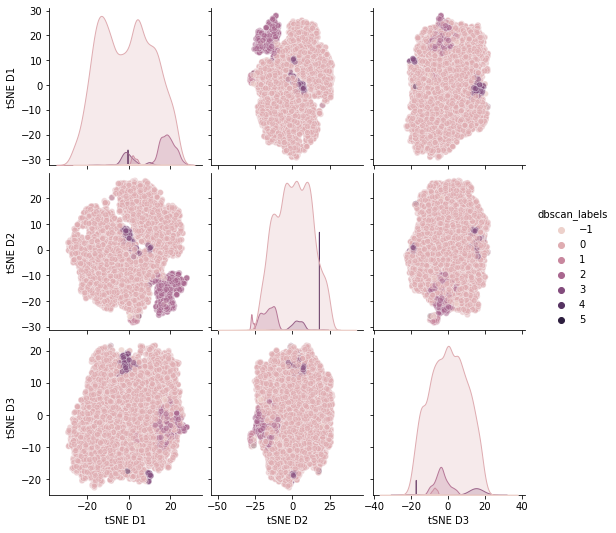

In [20]:
sns.pairplot(DB_tsne_df, hue = 'dbscan_labels', plot_kws={'alpha':0.5})

### 2.3 Hierarchical Clustering

## TALK ABOUT HIERARCHICAL CLUSTERING